In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as plt
import datetime 
%matplotlib inline
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False

import matplotlib.pyplot as plt
%matplotlib inline

import platform
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from matplotlib import font_manager, rc
from matplotlib import style

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 

In [57]:
injury_df = pd.read_csv('nba_injury_merge_position.csv')

injury_df.head()

,name,age,season,Notes,position
0,Tony Parker,37,18,50.0,G
1,Manu Ginobili,41,16,44.0,G
2,Dwyane Wade,37,16,43.0,G
3,Andrew Bogut,36,14,36.0,C
4,Sean Marks,36,11,35.0,F-C


In [ ]:
# 포지션 상관관계 알기위해  포지션 인코딩 하기

In [58]:
from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.tree     import DecisionTreeClassifier
from sklearn.model_selection import  GridSearchCV,train_test_split
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [59]:
item_label  = list(injury_df.groupby('position').agg({'position':'count'}).index)

encoder = LabelEncoder()
encoder.fit(item_label)

digit_label = encoder.transform(item_label)
print('encoder 결과', digit_label)

print('decoder 결과', encoder.inverse_transform(digit_label))

digit_label = digit_label.reshape(-1,1)
print(digit_label)
print(digit_label.shape)

encoder 결과 [0 1 2 3 4 5 6]
decoder 결과 ['C' 'C-F' 'F' 'F-C' 'F-G' 'G' 'G-F']
[[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]]
(7, 1)


In [60]:
ont_hot_encoder = OneHotEncoder()
ont_hot_encoder.fit(digit_label)
ont_hot_label = ont_hot_encoder.transform(digit_label)
print(ont_hot_label.toarray())
print(ont_hot_label.shape)

[[1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1.]]
(7, 7)


In [27]:
pd.get_dummies(injury_df)

,age,season,Notes,name_Aaron Brooks,name_Aaron Gray,name_Adam Morrison,name_Adonal Foyle,name_Al Harrington,name_Al Jefferson,name_Allen Iverson,...,name_Zach Randolph,name_Zaza Pachulia,name_Zydrunas Ilgauskas,position_C,position_C-F,position_F,position_F-C,position_F-G,position_G,position_G-F
0,37,18,50.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,41,16,44.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,37,16,43.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,36,14,36.0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,36,11,35.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5,38,9,35.0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
6,32,5,34.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
7,36,12,30.0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8,36,12,28.0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
9,37,17,27.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [61]:
def posi_digt(x,item_label,digit_label):
    for idx, value in enumerate(item_label):
        if x == value:
            return digit_label[idx][0]
        
injury_df['position_digtt'] = injury_df['position'].apply(lambda x:posi_digt(x,item_label,digit_label))
injury_df.head()

In [8]:
def corr(data,text):
    corr = data.corr(method='pearson')
    display(corr)
    fig = plt.figure(figsize=(20,20))
    style.use('ggplot')
    plt.title(text)
    sns.heatmap(data = corr, annot=True, fmt = '.2f', linewidths=.5, cmap='Blues')

,age,season,Notes,position_digtt
age,1.000000,0.717622,0.247140,0.068248
season,0.717622,1.000000,0.436517,-0.021512
Notes,0.247140,0.436517,1.000000,-0.068136
position_digtt,0.068248,-0.021512,-0.068136,1.000000


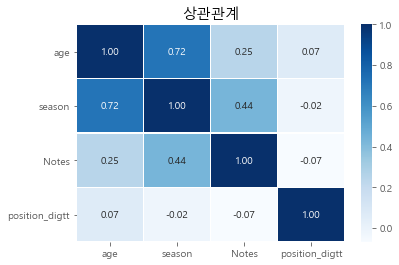

In [36]:
corr(injury_df,'상관관계')

# 다른 정보들이랑 합치기

In [63]:
nba_all = pd.read_csv('all_seasons.csv').drop('Unnamed: 0',axis=1)
nba_all.head()

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,Dennis Rodman,CHI,36.0,198.12,99.790240,Southeastern Oklahoma State,USA,1986,2,27,...,5.7,16.1,3.1,16.1,0.186,0.323,0.100,0.479,0.113,1996-97
1,Dwayne Schintzius,LAC,28.0,215.90,117.933920,Florida,USA,1990,1,24,...,2.3,1.5,0.3,12.3,0.078,0.151,0.175,0.430,0.048,1996-97
2,Earl Cureton,TOR,39.0,205.74,95.254320,Detroit Mercy,USA,1979,3,58,...,0.8,1.0,0.4,-2.1,0.105,0.102,0.103,0.376,0.148,1996-97
3,Ed O'Bannon,DAL,24.0,203.20,100.697424,UCLA,USA,1995,1,9,...,3.7,2.3,0.6,-8.7,0.060,0.149,0.167,0.399,0.077,1996-97
4,Ed Pinckney,MIA,34.0,205.74,108.862080,Villanova,USA,1985,1,10,...,2.4,2.4,0.2,-11.2,0.109,0.179,0.127,0.611,0.040,1996-97


In [21]:
nba_all.columns

Index(['player_name', 'team_abbreviation', 'age', 'player_height',
       'player_weight', 'college', 'country', 'draft_year', 'draft_round',
       'draft_number', 'gp', 'pts', 'reb', 'ast', 'net_rating', 'oreb_pct',
       'dreb_pct', 'usg_pct', 'ts_pct', 'ast_pct', 'season'],
      dtype='object')

In [64]:
import math
# 평균을 구하고 모두 소수 2번쨰까지만 살리기
nba_all_group = nba_all.groupby('player_name',as_index=False).mean()
for i in range(nba_all_group.shape[0]):
    for i2 in range(len(list(nba_all_group.columns))):
        if i2 == 0:
            continue
        elif i2 == 1:
            nba_all_group.iloc[i,i2] =  nba_all_group.iloc[i,i2].astype('int64')
        else:
            nba_all_group.iloc[i,i2] = round(nba_all_group.iloc[i,i2],2)

In [65]:
nba_all_group['age'] = nba_all_group['age'].astype('int64')
nba_all_group.head()

,player_name,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
0,A.C. Green,35,205.74,102.06,75.80,5.78,6.06,0.86,-1.88,0.09,0.19,0.13,0.49,0.05
1,A.J. Bramlett,23,208.28,102.97,8.00,1.00,2.80,0.00,-32.60,0.16,0.21,0.15,0.19,0.00
2,A.J. Guyton,24,185.42,81.65,26.67,3.80,0.70,1.57,-6.70,0.01,0.04,0.22,0.32,0.28
3,AJ Hammons,24,213.36,117.93,22.00,2.20,1.60,0.20,-0.60,0.05,0.20,0.17,0.47,0.04
4,AJ Price,25,187.96,84.82,43.50,5.35,1.33,2.00,-2.23,0.02,0.09,0.21,0.48,0.25


In [67]:
df_merge = pd.merge(injury_df,nba_all_group,left_on='name',right_on='player_name',how='left').\
drop('age_y',axis=1).rename(columns={'age_x':'age'})

df_merge.drop('player_name',axis=1,inplace=True)
df_merge.head()

,name,age,season,Notes,position,position_digtt,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
0,Tony Parker,37,18,50.0,G,5,187.96,82.55,69.67,15.37,2.66,5.59,7.11,0.01,0.09,0.25,0.54,0.31
1,Manu Ginobili,41,16,44.0,G,5,198.12,93.27,66.06,13.15,3.48,3.78,10.23,0.03,0.13,0.24,0.58,0.24
2,Dwyane Wade,37,16,43.0,G,5,193.04,98.66,65.88,21.83,4.64,5.39,4.00,0.04,0.11,0.31,0.55,0.28
3,Andrew Bogut,36,14,36.0,C,0,213.36,116.96,50.43,8.60,8.19,2.04,3.07,0.10,0.25,0.16,0.55,0.12
4,Sean Marks,36,11,35.0,F-C,3,208.28,113.40,20.91,2.45,1.70,0.15,-14.07,0.06,0.19,0.18,0.50,0.03


,age,season,Notes,position_digtt,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
age,1.000000,0.717622,0.247140,0.068248,-0.059116,-0.044118,0.502701,0.431662,0.287836,0.343341,0.479105,-0.154234,0.045090,0.238071,0.347038,0.159173
season,0.717622,1.000000,0.436517,-0.021512,0.032035,0.057944,0.677862,0.634562,0.503641,0.415138,0.469399,-0.124637,0.141311,0.345183,0.412013,0.121873
Notes,0.247140,0.436517,1.000000,-0.068136,0.080927,0.069699,0.069744,0.234687,0.168199,0.137735,0.205677,-0.035589,0.095538,0.195906,0.237993,0.059232
position_digtt,0.068248,-0.021512,-0.068136,1.000000,-0.791788,-0.782105,0.044085,0.108298,-0.444763,0.475288,0.027787,-0.703399,-0.661059,0.127553,-0.006365,0.572836
player_height,-0.059116,0.032035,0.080927,-0.791788,1.000000,0.852278,-0.065990,-0.048963,0.534781,-0.561886,0.016140,0.746899,0.749220,-0.064784,0.070136,-0.701294
player_weight,-0.044118,0.057944,0.069699,-0.782105,0.852278,1.000000,-0.037826,-0.021301,0.556963,-0.509168,-0.017323,0.757903,0.749285,-0.014912,0.097053,-0.636803
gp,0.502701,0.677862,0.069744,0.044085,-0.065990,-0.037826,1.000000,0.590278,0.492029,0.456826,0.478416,-0.178189,0.066368,0.230094,0.549270,0.156594
pts,0.431662,0.634562,0.234687,0.108298,-0.048963,-0.021301,0.590278,1.000000,0.603509,0.576490,0.436542,-0.193369,0.082131,0.823879,0.508745,0.262144
reb,0.287836,0.503641,0.168199,-0.444763,0.534781,0.556963,0.492029,0.603509,1.000000,0.063998,0.375023,0.481569,0.762566,0.391258,0.438118,-0.238098
ast,0.343341,0.415138,0.137735,0.475288,-0.561886,-0.509168,0.456826,0.576490,0.063998,1.000000,0.372313,-0.507312,-0.374430,0.404456,0.263148,0.859952


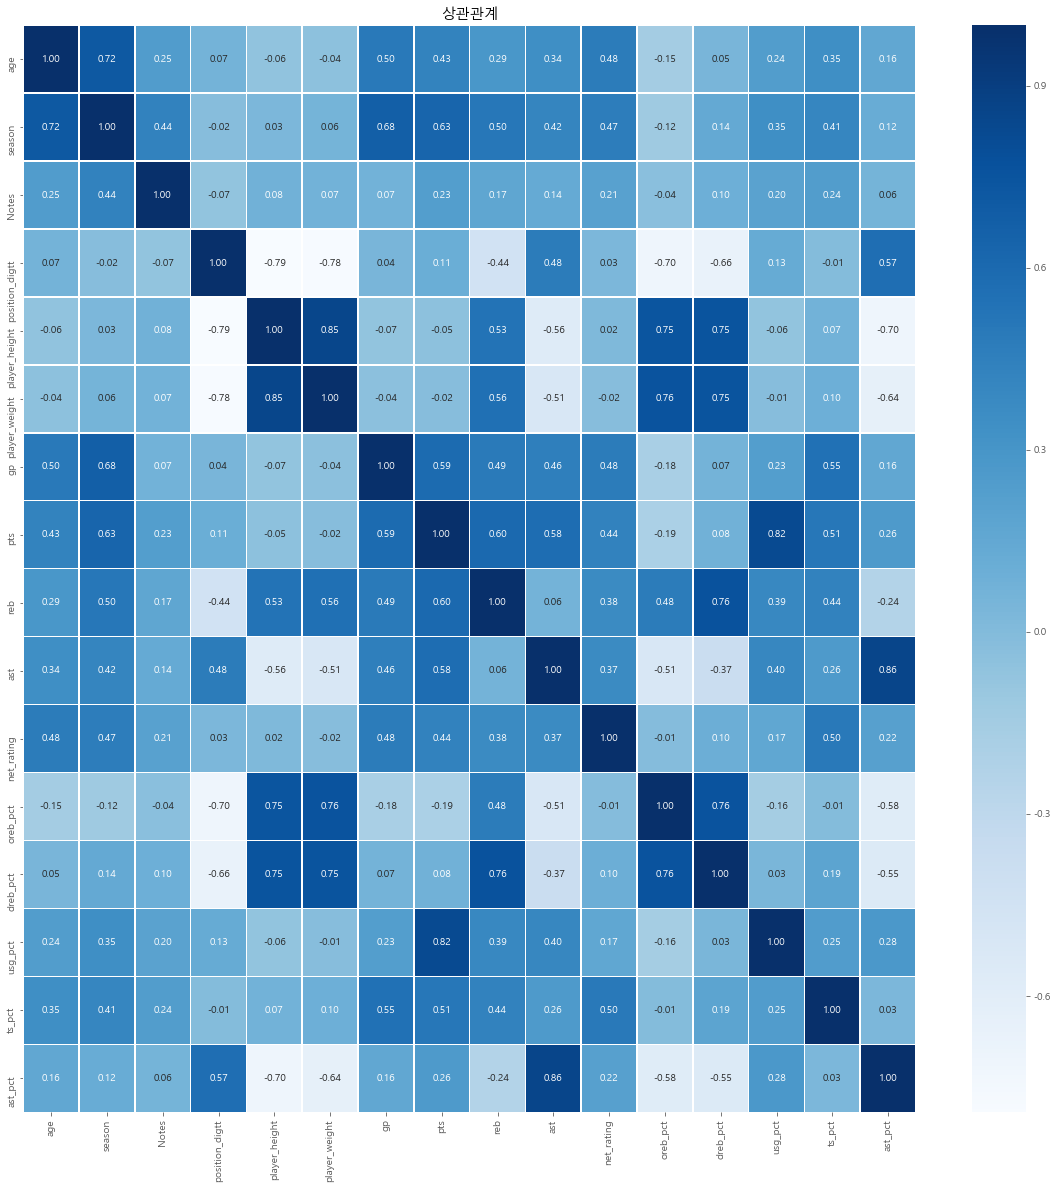

In [65]:
corr(df_merge,'상관관계')

In [8]:
from sklearn.tree     import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, cross_validate

In [19]:
### 다시 crossval
cvs_dtc = DecisionTreeClassifier(random_state = 200)
feature = df_merge.drop(['age','name','position','player_name'],axis=1)
label = df_merge[['age']]
display(feature.head())
display(label.head())
scoring = cross_val_score(cvs_dtc, feature,label,scoring='accuracy',cv=5 )
print('교차 검증별 정확도 :',scoring)
print('평균 검증 정확도 :',np.mean(scoring))

,season,Notes,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
0,18,50.0,187.96,82.55,69.67,15.37,2.66,5.59,7.11,0.01,0.09,0.25,0.54,0.31
1,16,44.0,198.12,93.27,66.06,13.15,3.48,3.78,10.23,0.03,0.13,0.24,0.58,0.24
2,16,43.0,193.04,98.66,65.88,21.83,4.64,5.39,4.00,0.04,0.11,0.31,0.55,0.28
3,14,36.0,213.36,116.96,50.43,8.60,8.19,2.04,3.07,0.10,0.25,0.16,0.55,0.12
4,11,35.0,208.28,113.40,20.91,2.45,1.70,0.15,-14.07,0.06,0.19,0.18,0.50,0.03


,age
0,37
1,41
2,37
3,36
4,36


교차 검증별 정확도 : [0.05714286 0.34285714 0.14285714 0.14705882 0.11764706]
평균 검증 정확도 : 0.16151260504201684


In [33]:
scoring = cross_val_score(cvs_dtc, feature,label,scoring='accuracy',cv=10)
print('교차 검증별 정확도 :',scoring)
print('평균 검증 정확도 :',np.mean(scoring))

교차 검증별 정확도 : [0.22222222 0.22222222 0.22222222 0.23529412 0.11764706 0.11764706
 0.11764706 0.23529412 0.17647059 0.05882353]
평균 검증 정확도 : 0.17254901960784313


In [34]:
from sklearn.metrics import accuracy_score

In [67]:
X_train, X_test , y_train, y_test = train_test_split(feature, 
                                                     label,
                                                     test_size=0.2,
                                                    random_state=200)

In [68]:
gscv_tree = DecisionTreeClassifier()
params = {'criterion' : ['gini', 'entropy'], 
          'splitter' : ['random','best'], 
          'max_depth' : [1,2,3], 
          'min_samples_split' : [2,3]}

grid_gscv_tree = GridSearchCV(gscv_tree, param_grid = params,cv=10,refit=True )

grid_gscv_tree.fit(X_train, y_train)
grid_gscv_tree.cv_results_
score_df = pd.DataFrame(grid_gscv_tree.cv_results_)
display(score_df[['params', 'mean_test_score', 'rank_test_score','split0_test_score','split1_test_score','split2_test_score']].head(10))

print('최적의 파라미터 : ', grid_gscv_tree.best_params_)
print('높은 정확도 : ', grid_gscv_tree.best_score_)

estimator = grid_gscv_tree.best_estimator_
prediction = estimator.predict(X_test)

print('테스트 세트의 정확도 : ', accuracy_score(y_test,prediction))
y_test['prediction'] = prediction
display(y_test)

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.181868,12,0.071429,0.142857,0.142857
1,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.181319,14,0.214286,0.214286,0.071429
2,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.181868,13,0.214286,0.071429,0.142857
3,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.181319,14,0.214286,0.214286,0.071429
4,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.223626,3,0.285714,0.142857,0.142857
5,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.231868,1,0.285714,0.214286,0.285714
6,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.144505,23,0.285714,0.142857,0.071429
7,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.231868,1,0.285714,0.214286,0.285714
8,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.159341,20,0.285714,0.285714,0.000000
9,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.194505,10,0.285714,0.214286,0.285714


최적의 파라미터 :  {'criterion': 'gini', 'max_depth': 2, 'min_samples_split': 2, 'splitter': 'best'}
높은 정확도 :  0.23186813186813188
테스트 세트의 정확도 :  0.2571428571428571


,age,prediction
135,40,35
62,41,37
164,30,31
74,35,35
146,37,33
60,33,35
47,38,37
75,33,33
59,36,35
11,40,37


In [69]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 173 entries, 0 to 172
Data columns (total 19 columns):
name              173 non-null object
age               173 non-null int64
season            173 non-null int64
Notes             173 non-null float64
position          173 non-null object
position_digtt    173 non-null int64
player_name       173 non-null object
player_height     173 non-null float64
player_weight     173 non-null float64
gp                173 non-null float64
pts               173 non-null float64
reb               173 non-null float64
ast               173 non-null float64
net_rating        173 non-null float64
oreb_pct          173 non-null float64
dreb_pct          173 non-null float64
usg_pct           173 non-null float64
ts_pct            173 non-null float64
ast_pct           173 non-null float64
dtypes: float64(13), int64(3), object(3)
memory usage: 32.0+ KB


In [72]:
### 데이터 정규화와 표준화하기
def feture_scaling(df, scaling_strategy, column=None):
    if column == None:
        column = [column_name for column_name in df.columns]
    for column_name in column:
        if scaling_strategy == "min-max":
            df[column_name] = ( df[column_name] - df[column_name].min() ) /\
                            (df[column_name].max() - df[column_name].min()) 
        elif scaling_strategy == "z-score":
            df[column_name] = ( df[column_name] - \
                               df[column_name].mean() ) /\
                            (df[column_name].std() )
    return df

In [21]:
n_df = feture_scaling(df_merge,'min_max',column=['age','season','Notes','position_digtt','player_height','player_weight','gp',
                                                'pts','reb','ast','net_rating','oreb_pct','dreb_pct','usg_pct','ts_pct','ast_pct'])
f_df = feture_scaling(df_merge,'z-score',column=['age','season','Notes','position_digtt','player_height','player_weight','gp',
                                                'pts','reb','ast','net_rating','oreb_pct','dreb_pct','usg_pct','ts_pct','ast_pct'])

display(n_df.head())
display(f_df.head())

NameError: name 'feture_scaling' is not defined

In [82]:
from sklearn.preprocessing import  StandardScaler, MinMaxScaler

In [74]:
item_label  = list(df_merge.groupby('name').agg({'name':'count'}).index)

encoder = LabelEncoder()
encoder.fit(item_label)

name_label = encoder.transform(item_label)
# print('encoder 결과', digit_label)

# print('decoder 결과', encoder.inverse_transform(digit_label))

name_label = name_label.reshape(-1,1)
# print(name_label)
# print(name_label.shape)

In [84]:
def name_digt(x,item_label,digit_label):
    for idx, value in enumerate(item_label):
        if x == value:
            return digit_label[idx][0]
        
df_merge['name_digtt'] = df_merge['name'].apply(lambda x:name_digt(x,item_label,name_label))
df_merge.head()

df_merge_name_none = df_merge.drop(['name','position'],axis=1)

In [103]:
df_merge.to_csv('df_merge_new.csv',mode='w')
df_merge_name_none.to_csv('df_merge_digit.csv',mode='w')

In [93]:
train_array=df_merge_name_none.loc[0:100,:]
test_array=df_merge_name_none.loc[101:,:]

In [28]:
std_scaler  = StandardScaler()

df_std = std_scaler.fit(df_merge[['age','season','Notes','position_digtt','player_height','player_weight','gp',
                             'pts','reb','ast','net_rating','oreb_pct','dreb_pct','usg_pct','ts_pct','ast_pct']])\
                        .transform(df_merge[['age','season','Notes','position_digtt','player_height','player_weight','gp',
                             'pts','reb','ast','net_rating','oreb_pct','dreb_pct','usg_pct','ts_pct','ast_pct']])
df_std[:5]

array([[ 7.01827365e-01,  1.47377009e+00,  4.29638300e+00,
                    nan, -1.47127450e+00, -1.48761899e+00,
         9.71271523e-01,  1.20845409e+00, -5.53975616e-01,
         2.26395414e+00,  1.88913355e+00, -1.29148631e+00,
        -1.06799471e+00,  1.40005010e+00,  5.93504010e-01,
         2.10660822e+00],
       [ 1.90099906e+00,  1.05199635e+00,  3.59737899e+00,
                    nan, -3.72393440e-01, -6.92209255e-01,
         7.19446648e-01,  7.92338326e-01, -1.69047222e-01,
         1.12621808e+00,  2.60500903e+00, -7.49844780e-01,
        -2.80931517e-01,  1.17557497e+00,  1.51436673e+00,
         1.24938290e+00],
       [ 7.01827365e-01,  1.05199635e+00,  3.48087832e+00,
                    nan, -9.21833969e-01, -2.92278425e-01,
         7.06890283e-01,  2.41931347e+00,  3.75485628e-01,
         2.13823745e+00,  1.17555253e+00, -4.79024014e-01,
        -6.74463116e-01,  2.74690089e+00,  8.23719691e-01,
         1.73922594e+00],
       [ 4.02034441e-01,  6.30222612e

In [85]:
minmax_scaler  = MinMaxScaler()

df_minmax  = minmax_scaler.fit(df_merge[['age','season','Notes','position_digtt','player_height','player_weight','gp',
                             'pts','reb','ast','net_rating','oreb_pct','dreb_pct','usg_pct','ts_pct','ast_pct']])\
                        .transform(df_merge[['age','season','Notes','position_digtt','player_height','player_weight','gp',
                             'pts','reb','ast','net_rating','oreb_pct','dreb_pct','usg_pct','ts_pct','ast_pct']])
df_minmax [:5]

array([[0.64705882, 0.80952381, 1.        , 0.83333333, 0.11189427,
        0.13062569, 0.90826087, 0.57511924, 0.21793635, 0.63986014,
        0.87633769, 0.        , 0.15      , 0.72727273, 0.75      ,
        0.8       ],
       [0.88235294, 0.71428571, 0.87755102, 0.83333333, 0.33568282,
        0.27771679, 0.85594203, 0.48688394, 0.29701061, 0.42890443,
        1.        , 0.14285714, 0.35      , 0.68181818, 0.91666667,
        0.6       ],
       [0.64705882, 0.71428571, 0.85714286, 0.83333333, 0.22378855,
        0.35167398, 0.85333333, 0.83187599, 0.40887175, 0.61655012,
        0.75307174, 0.21428571, 0.25      , 1.        , 0.79166667,
        0.71428571],
       [0.58823529, 0.61904762, 0.71428571, 0.        , 0.67136564,
        0.60277168, 0.62942029, 0.30604134, 0.7512054 , 0.22610723,
        0.71621086, 0.64285714, 0.95      , 0.31818182, 0.79166667,
        0.25714286],
       [0.58823529, 0.47619048, 0.69387755, 0.5       , 0.55947137,
        0.55392426, 0.2015942 , 

In [86]:
### 테스트 데이터는 스케일링을 실시해도 트레인 데이터는 하면 안 된다. 트레인 데이터만 다시 스케일링한다.
from sklearn.preprocessing import  StandardScaler, MinMaxScaler
scaler = MinMaxScaler()
train_scaler = scaler.fit(train_array).transform(train_array)

test_scaler = scaler.transform(test_array)

In [87]:
train_scaler

array([[0.6       , 0.8       , 1.        , ..., 0.75      , 0.82352941,
        0.92307692],
       [0.86666667, 0.7       , 0.85      , ..., 0.91666667, 0.61764706,
        0.5739645 ],
       [0.6       , 0.7       , 0.825     , ..., 0.79166667, 0.73529412,
        0.26627219],
       ...,
       [0.6       , 0.3       , 0.        , ..., 0.70833333, 0.17647059,
        0.20118343],
       [0.6       , 0.7       , 0.        , ..., 0.75      , 0.17647059,
        0.84615385],
       [0.4       , 0.55      , 0.        , ..., 0.875     , 0.14705882,
        0.69230769]])

In [88]:
test_scaler

array([[ 0.53333333,  0.3       ,  0.        , ...,  0.20833333,
         0.02941176,  0.27218935],
       [ 0.2       ,  0.1       ,  0.        , ...,  0.41666667,
         0.64705882,  0.68047337],
       [ 0.4       ,  0.5       ,  0.        , ...,  0.66666667,
         0.23529412,  0.63313609],
       ...,
       [ 0.73333333,  0.1       , -0.225     , ...,  0.875     ,
         0.64705882,  0.67455621],
       [ 0.66666667,  0.1       , -0.225     , ...,  0.45833333,
         0.32352941,  0.42011834],
       [ 0.33333333, -0.05      , -0.225     , ...,  0.29166667,
         0.08823529,  0.94674556]])

In [38]:
from sklearn.metrics import confusion_matrix

In [94]:
label = df_merge_name_none['age']
feature = df_merge_name_none.drop('age',axis=1)

In [95]:
x_train, X_test, y_train, y_test = train_test_split(feature,
                                                   label,
                                                   test_size=0.2,
                                                   random_state=10)

In [98]:
from sklearn.metrics import recall_score, precision_score

In [100]:
def display_eval(y_test, y_pred):
    confusion = confusion_matrix(y_test,y_pred)
    accuracy  = accuracy_score(y_test, y_pred)
    presicion = precision_score(y_test, y_pred)
    recall    = recall_score(y_test, y_pred)
    
    print()
    print(confusion)
    print('*'*50)
    print()
    print('정확도 : {}, 정밀도 : {}, 재현율 : {}'.format(accuracy,presicion, recall))